# 03 PCA Example

The same stability criterion can be used for PCA, too.

In [39]:
from staNMF import staNMF
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from staNMF.main import amariMaxError, findcorrelation
from sklearn.decomposition import PCA
import scipy as sp

In [78]:
# load data
n_features = 10
n_samples = 400
n_components = 5
V = np.random.normal(0, 1, (n_components, n_features))
U = np.random.normal(0, 1, (n_samples, n_components))
X = (
    U @ np.diag(1 / np.arange(1, n_components + 1) ** .3) @ V 
    + np.random.normal(0,1,(n_samples, n_features)) * 0.1
)

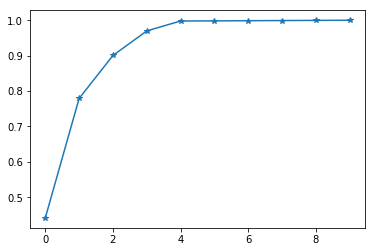

In [79]:
# visualize the eigvalue of X
eigen_value, _ = np.linalg.eig(X.T @ X)
plt.plot(eigen_value.cumsum() / np.sum(eigen_value), '-*')

In [80]:
# define_model
model = staNMF(X,folderID="toy_pca_example", K1=3, K2=7, parallel=True, replicates=100, seed=None)

In [81]:
class sklearn_pca(PCA):
    '''
    Train PCA via sklearn package

    Parameteres
    -----------
    bootstrap : bool, optional with default False
        Do bootstrap to X before fitting

    All the parameters in sklearn PCA

    Attributes
    ----------
    All the attributes in sklearn.decomposition._pca.PCA

    Examples
    --------
    TODO : add an example

    References
    ----------
    TODO : add refs to spams package

    '''
    def __init__(self, n_components=None, copy=True, whiten=False,
                 svd_solver='auto', tol=0.0, iterated_power='auto',
                 random_state=None, bootstrap=False):
        self.n_components = n_components
        self.copy = copy
        self.whiten = whiten
        self.svd_solver = svd_solver
        self.tol = tol
        self.iterated_power = iterated_power
        self.random_state = random_state
        self.bootstrap = bootstrap

    def set_n_components(self, K):
        self.n_components = K

    def fit(self, X, y=None, **kwargs):
        '''
        Fit PCA model using sklearn package

        Parameters
        ----------
        X : array, shape (n_samples, n_features)
            Data matrix to be fitted by the model

        y : ignored

        bootstrap : bool, optional with default False
            Whether bootstrap the input matrix X

        Returns
        -------
        self

        '''
        # Set the seed for numpy.random
        np.random.seed(self.random_state)

        # Create bootstrapped X
        if self.bootstrap:
            n_samples = X.shape[0]
            bootstrap_X = X[np.random.choice(
                n_samples,
                n_samples,
                replace=True,
            )]
        else:
            bootstrap_X = X

        # Call the super fit method
        return super(sklearn_pca, self).fit(bootstrap_X, **kwargs)


In [82]:
# run NMF for different Ks
model.runNMF(sklearn_pca(bootstrap=True))

Working on K = 3...
Working on K = 4...
Working on K = 5...
Working on K = 6...
Working on K = 7...


In [83]:
# compute the instability
model.instability("sklearn_pca")

Calculating instability for 3
Calculating instability for 4
Calculating instability for 5
Calculating instability for 6
Calculating instability for 7


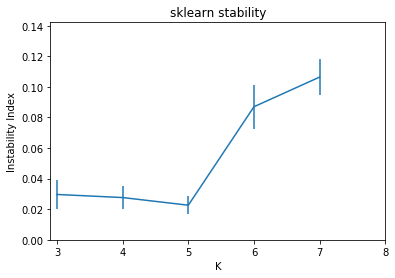

In [84]:
# visualize the instability result
model.plot(dataset_title="sklearn stability")

In [85]:
model.get_instability()

{3: 0.02964800477017213,
 4: 0.02762716238081201,
 5: 0.022620200529777756,
 6: 0.08701227132067242,
 7: 0.10641230259432026}

- Observation: the staNMF chooses the right number of components.